https://medium.com/@natsunoyuki/hidden-markov-models-with-python-c026f778dfa7

In [11]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [20]:
import yfinance as yf
yfin.pdr_override()

In [29]:
ticker = yf.Ticker("AAPL")
# get all stock info
data.info

{'regularMarketPrice': None, 'logo_url': ''}

In [75]:
# get historical market data
data = ticker.history(period="120mo")
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-05-28,13.950067,13.987584,13.669453,13.687746,386145200,0.0,0.0
2013-05-29,13.643095,13.875648,13.624490,13.796579,330576400,0.0,0.0
2013-05-30,13.818286,14.092699,13.782938,14.002158,353519600,0.0,0.0
2013-05-31,14.030684,14.173318,13.937664,13.944797,384302800,0.0,0.0
2013-06-03,13.975803,14.026344,13.719995,13.975493,372352400,0.0,0.0


In [76]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [77]:
# Convert the datetime from str to datetime object.
data["datetime"] = pd.to_datetime(data.index)

In [78]:
# Restrict the data to later than 2008 Jan 01.
data = data[data["datetime"] >= pd.to_datetime("2008-01-01")]

In [79]:
# Determine the daily change in gold price.
data["change"] = data["Close"]/data["Close"].shift()-1

In [80]:
# Determine the daily change in gold price.
data["vol"] = (data["High"]-data["Low"])/data["Open"]

In [81]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,datetime,change,vol
Date,,,,,,,,,,
2013-05-28,13.950067,13.987584,13.669453,13.687746,386145200,0.0,0.0,2013-05-28,NaN,0.022805
2013-05-29,13.643095,13.875648,13.624490,13.796579,330576400,0.0,0.0,2013-05-29,0.007951,0.018409
2013-05-30,13.818286,14.092699,13.782938,14.002158,353519600,0.0,0.0,2013-05-30,0.014901,0.022417
2013-05-31,14.030684,14.173318,13.937664,13.944797,384302800,0.0,0.0,2013-05-31,-0.004097,0.016796
2013-06-03,13.975803,14.026344,13.719995,13.975493,372352400,0.0,0.0,2013-06-03,0.002201,0.021920


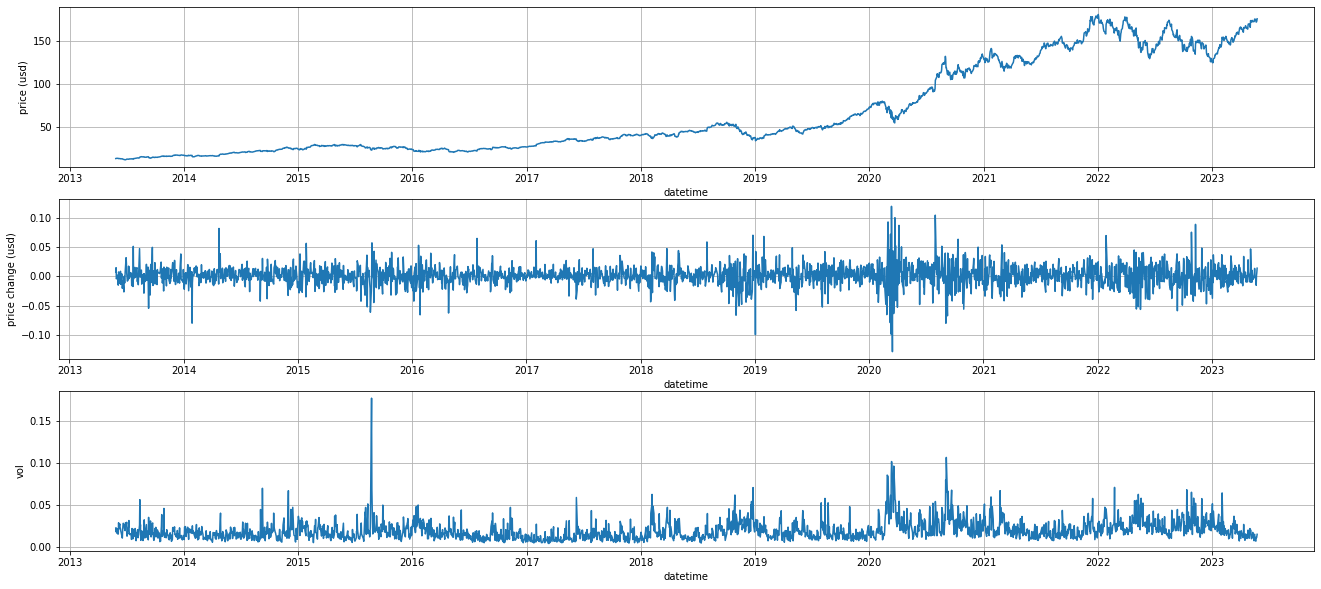

In [82]:
# Plot the daily gold prices as well as the daily change.
plt.figure(figsize = (22.5, 10))
plt.subplot(3,1,1)
plt.plot(data["datetime"], data["Close"])
plt.xlabel("datetime")
plt.ylabel("price (usd)")
plt.grid(True)
plt.subplot(3,1,2)
plt.plot(data["datetime"], data["change"])
plt.xlabel("datetime")
plt.ylabel("price change (usd)")
plt.grid(True)
plt.subplot(3,1,3)
plt.plot(data["datetime"], data["vol"])
plt.xlabel("datetime")
plt.ylabel("vol")
plt.grid(True)
plt.show()

In [83]:
# Use the daily change in gold price as the observed measurements X.
X = data[["change", "vol"]].values[1:]

In [84]:
# Build the HMM model and fit to the gold price change data.
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 50, random_state = 42)
model.fit(X)

GaussianHMM(n_components=3, n_iter=50, random_state=42)

In [85]:
# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)

In [86]:
print("Unique states:")
print(states)

Unique states:
[0 1 2]


In [87]:
print("\nStart probabilities:")
print(model.startprob_)


Start probabilities:
[1.00000000e+00 1.22361337e-13 1.39904538e-72]


In [88]:
print("\nTransition matrix:")
print(model.transmat_)


Transition matrix:
[[6.80001687e-04 9.99031578e-01 2.88420021e-04]
 [8.37266009e-01 1.97804182e-02 1.42953573e-01]
 [8.78458794e-02 1.28102314e-01 7.84051807e-01]]


In [89]:
print("\nGaussian distribution means:")
print(model.means_)


Gaussian distribution means:
[[ 0.00116273  0.01535632]
 [ 0.00221119  0.01527877]
 [-0.00036895  0.03321923]]


In [90]:
print("\nGaussian distribution covariances:")
print(model.covars_)


Gaussian distribution covariances:
[[[1.32828748e-04 0.00000000e+00]
  [0.00000000e+00 4.51934075e-05]]

 [[1.22114578e-04 0.00000000e+00]
  [0.00000000e+00 4.05937600e-05]]

 [[9.30946313e-04 0.00000000e+00]
  [0.00000000e+00 2.21340706e-04]]]


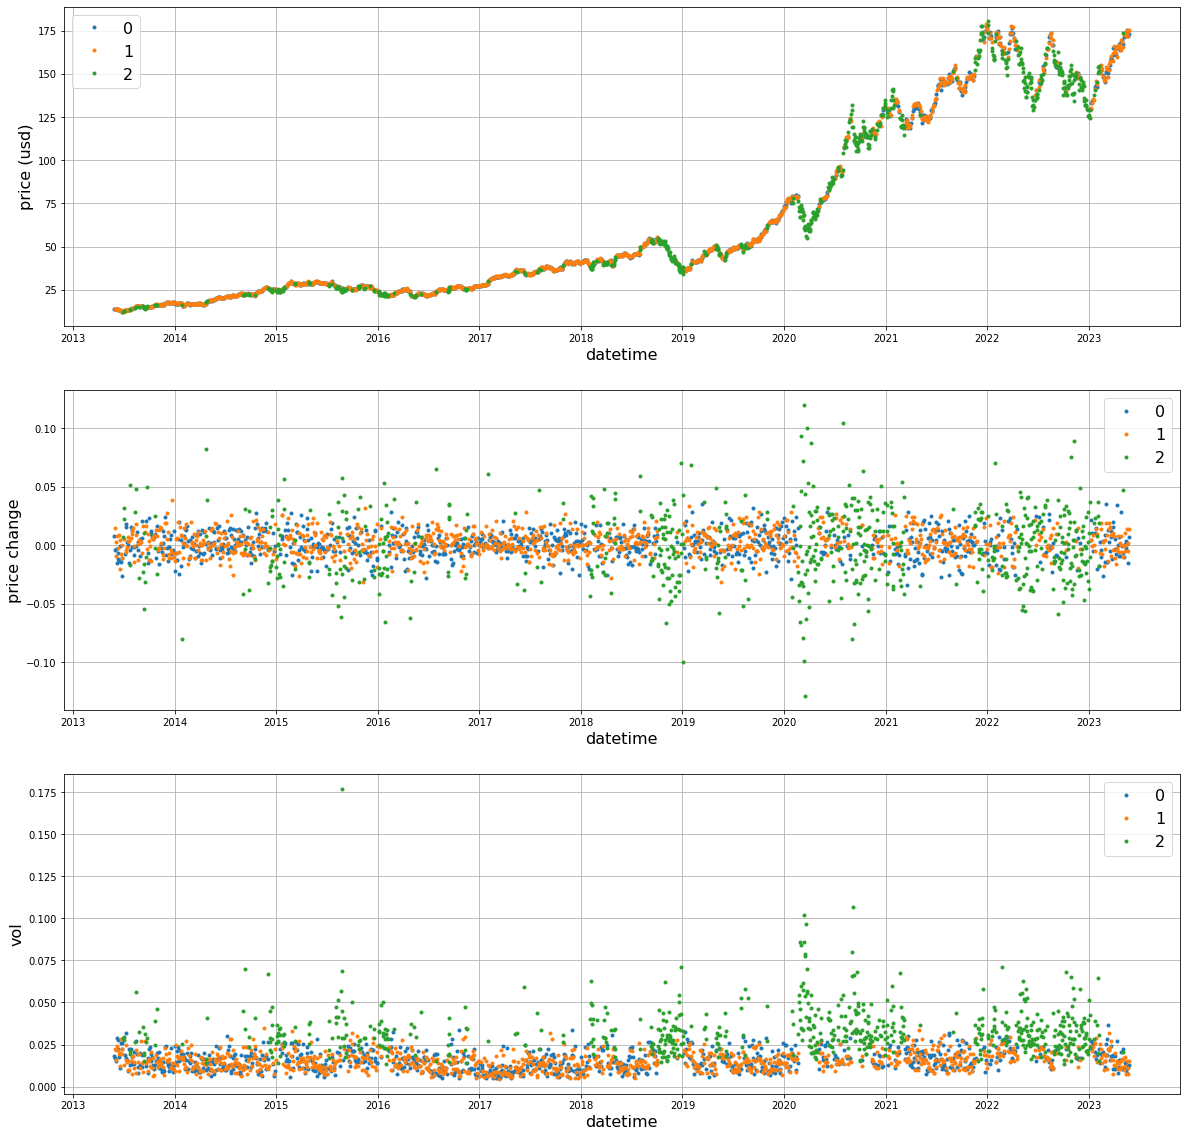

In [91]:
plt.figure(figsize = (20, 20))
plt.subplot(3,1,1)
for i in states:
    want = (Z == i)
    x = data[1:]["datetime"].iloc[want]
    y = data[1:]["Close"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("price (usd)", fontsize=16)

plt.subplot(3,1,2)
for i in states:
    want = (Z == i)
    x = data[1:]["datetime"].iloc[want]
    y = data[1:]["change"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("price change", fontsize=16)

plt.subplot(3,1,3)
for i in states:
    want = (Z == i)
    x = data[1:]["datetime"].iloc[want]
    y = data[1:]["vol"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("vol", fontsize=16)
plt.show()